In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore')

In [13]:
train = pd.read_parquet('train_data.parquet')
train.head(5)
train.drop(columns = ['timestamp', 'expiry'], inplace = True)

In [14]:
train.head(5)

,underlying,call_iv_23500,call_iv_23600,call_iv_23700,call_iv_23800,call_iv_23900,call_iv_24000,call_iv_24100,call_iv_24200,call_iv_24300,...,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41
0,24160.9,0.237872,0.213056,0.191247,0.173081,0.157550,0.146430,0.140084,0.139703,0.143353,...,0.013995,0.007922,-1.947502e+05,0.024715,0.530894,-0.002354,-3.224848e+05,-1.600795e+06,13063.446970,445511.363636
1,24188.1,0.236015,0.213177,0.189552,0.169672,0.153648,0.141522,0.134405,0.132546,0.135621,...,-0.004976,-0.009555,-1.481909e+06,-0.004020,-1.429919,-0.000843,1.658073e+06,-1.742468e+06,31364.628427,-46123.161765
2,24148.6,0.225757,0.199469,0.178547,0.156187,0.140276,0.130288,0.124253,0.124126,0.128211,...,-0.012869,-0.004012,-1.250688e+06,-0.035342,-0.523109,0.013778,-2.646675e+06,-5.051008e+07,-847564.971737,-225333.881579
3,24147.4,0.220805,0.195398,0.176247,0.155271,0.139753,0.129641,0.123994,0.123912,0.128196,...,-0.006014,0.004207,6.378700e+05,-0.045472,0.741664,0.002590,-1.607321e+06,4.170899e+05,333918.361928,-114960.453869
4,24155.9,0.220088,0.195815,0.177803,0.156409,0.141458,0.130448,0.124707,0.124395,0.128867,...,0.020878,-0.001747,9.592702e+04,0.044814,-0.015472,0.012185,6.820360e+05,4.081106e+06,3309.895833,183946.289063


<Axes: xlabel='underlying'>

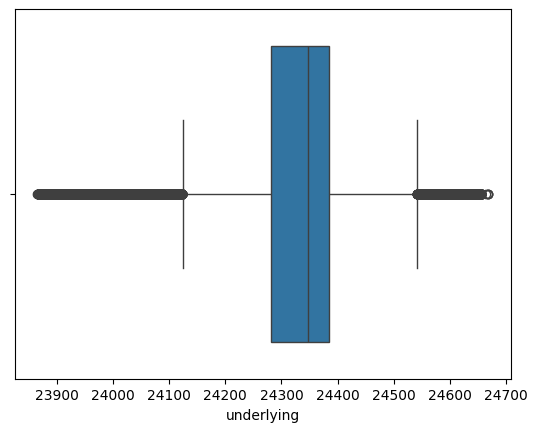

In [15]:
sns.boxplot(x = train['underlying'])

In [ ]:
 first_quartile = train['underlying'].quantile(.25)
 third_quartile = train['underlying'].quantile(.75)
 IQR = third_quartile- first_quartile
 new_boundary = third_quartile + 3 * IQR
 new_boundary

In [ ]:
sns.histplot(x = train['underlying'] , kde = True)

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [21]:
scaled_underlying = scaler.fit_transform(train[['underlying']])

<Axes: ylabel='Count'>

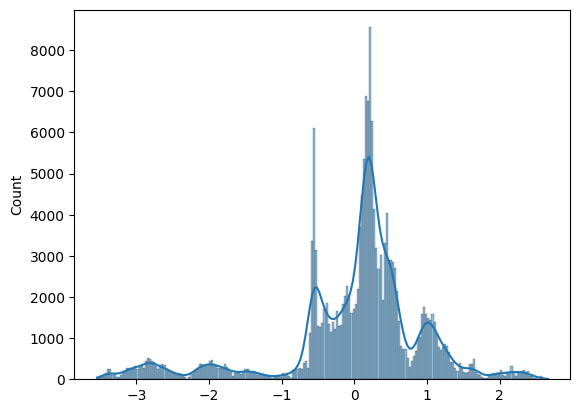

In [22]:
sns.histplot(x = scaled_underlying.flatten() , kde = True)

In [23]:
from scipy.stats import skew

print(skew(train['underlying']))  # original
print(skew(scaled_underlying.flatten()))

-1.2133651910468402
-1.2133651910468086


In [ ]:
sns.boxplot(x = scaled_underlying.flatten() )

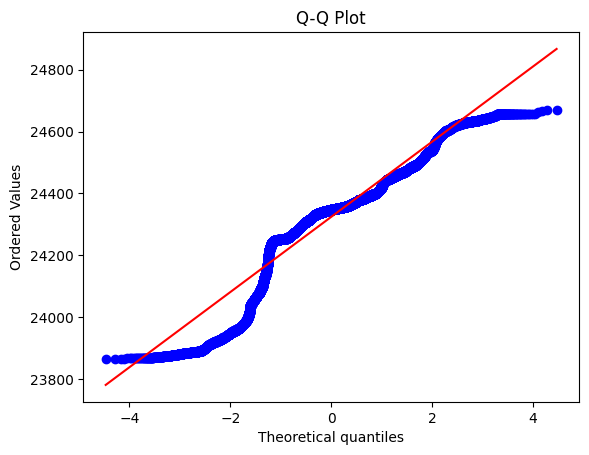

In [16]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(train['underlying'], dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

In [ ]:
from sklearn.preprocessing import PowerTransformer

In [ ]:
pt = PowerTransformer(method='yeo-johnson')
scaled_underlying = pt.fit_transform(train[['underlying']])

In [ ]:
skew(scaled_underlying.flatten())

In [ ]:
sns.histplot(x = scaled_underlying.flatten() , kde = True)

In [24]:
X_ = []
for col in train.columns:
    if 'X' in col:
        X_.append(col)

In [ ]:
skewed = []
heavily_skewed = []
for i in X_:
    if abs(skew(train[i])) > 0.5 and abs(skew(train[i])) < 5 :
        skewed.append(i)
    elif abs(skew(train[i])) > 5 :
        heavily_skewed.append(i)
        
    
print(skewed)
print(heavily_skewed)

        

In [ ]:
for i in skewed:
    pt = PowerTransformer(method='yeo-johnson')
    scaled = pt.fit_transform(train[[i]])
    skewness = skew(scaled.flatten())  # use a different variable name here
    print(f"{i}: Skewness after transformation = {skewness:.4f}")

In [ ]:
for i in heavily_skewed:
    pt = PowerTransformer(method='yeo-johnson')
    scaled = pt.fit_transform(train[[i]])
    skewness = skew(scaled.flatten())  # use a different variable name here
    print(f"{i}: Skewness after transformation = {skewness:.4f}")

In [ ]:
from sklearn.preprocessing import RobustScaler

# Initialize scaler
robust_scaler = RobustScaler()

In [ ]:
train[skewed] = robust_scaler.fit_transform(train[skewed])

In [ ]:
train[heavily_skewed] = robust_scaler.fit_transform(train[heavily_skewed])

In [ ]:
skewed = []
heavily_skewed = []
for i in X_:
    if abs(skew(train[i])) > 0.5 and abs(skew(train[i])) < 5 :
        skewed.append(i)
    elif abs(skew(train[i])) > 5 :
        heavily_skewed.append(i)
        
    
print(len(skewed))
len(heavily_skewed)

In [ ]:
for i in heavily_skewed:
    pt = PowerTransformer(method='yeo-johnson')
    scaled = pt.fit_transform(train[[i]])
    skewness = skew(scaled.flatten())  # use a different variable name here
    print(f"{i}: Skewness after transformation = {skewness:.4f}")

In [ ]:
for i in skewed:
    pt = PowerTransformer(method='yeo-johnson')
    scaled = pt.fit_transform(train[[i]])
    skewness = skew(scaled.flatten())  # use a different variable name here
    print(f"{i}: Skewness after transformation = {skewness:.4f}")

In [ ]:
stats.probplot(train['X17'], dist="norm", plot=plt)

In [ ]:
sns.histplot(train['X17'], kde=True)
plt.show()

sns.boxplot(x=train['X17'])
plt.show()

In [ ]:
df = train[X_]

In [ ]:
corr_matrix = df.corr()

In [ ]:
plt.figure(figsize=(12, 10))

# 3. Plot heatmap
sns.heatmap(corr_matrix, 
            annot=True,         # show correlation values
            fmt=".2f",          # format numbers to 2 decimals
            cmap='coolwarm',    # color map
            center=0,           # center the colormap at 0
            square=True,        # make cells square
            linewidths=0.5,     # line between cells
            cbar_kws={"shrink": 0.8})  # color bar size

plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

In [35]:
call_train = pd.read_parquet('call_train')

In [37]:
call_train.shape

(4636840, 45)

In [27]:
call_train['iv'].max()

np.float64(15603600000.0)

In [28]:
call_train['iv'].min()

np.float64(-1435870000000.0)

In [29]:
call_train['iv'].sort_values()

395955    -1.435870e+12
395929    -1.435870e+12
395903    -1.435870e+12
395877    -1.435870e+12
2336517   -4.993820e+06
               ...     
2245881    7.904570e+08
395957     1.560360e+10
395879     1.560360e+10
395905     1.560360e+10
395931     1.560360e+10
Name: iv, Length: 4636840, dtype: float64

In [38]:
col = 'iv'
Q1 = call_train[col].quantile(0.25)
Q3 = call_train[col].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Boolean mask for outliers
outliers_mask = (call_train[col] < lower_bound) | (call_train[col] > upper_bound)




# Calculate percentage
percent_outliers = outliers_mask.mean() * 100

print(f"Percentage of outliers in '{col}': {percent_outliers:.2f}%")

Percentage of outliers in 'iv': 12.03%


In [39]:
call_train_no_outliers = call_train[(call_train['iv'] >= lower_bound) & (call_train['iv'] <= upper_bound)]
print(f"Original data size: {call_train.shape[0]}")
print(f"Data size after removing outliers: {call_train_no_outliers.shape[0]}")


Original data size: 4636840
Data size after removing outliers: 4078811


In [40]:
call_train = call_train_no_outliers

In [41]:
call_train.shape

(4078811, 45)

In [42]:
call_train.columns

Index(['underlying', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8',
       'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18',
       'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28',
       'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38',
       'X39', 'X40', 'X41', 'k', 'iv'],
      dtype='object')

In [46]:
import pandas as pd

def remove_outliers_iqr_except_iv(df, exclude_col='iv'):
    df_cleaned = df.copy()
    
    numeric_cols = df_cleaned.select_dtypes(include='number').columns
    cols_to_check = [col for col in numeric_cols if col != exclude_col]
    
    # Create a mask for all rows that are NOT outliers
    mask = pd.Series([True] * len(df_cleaned), index=df_cleaned.index)
    
    for col in cols_to_check:
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        col_mask = (df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)
        mask &= col_mask  # combine masks

    # Apply the final combined mask only once
    return df_cleaned[mask]


In [47]:
call_train_cleaned = remove_outliers_iqr_except_iv(call_train)
print("Original shape:", call_train.shape)
print("Cleaned shape:", call_train_cleaned.shape)


Original shape: (4078811, 45)
Cleaned shape: (334058, 45)


In [48]:
call_train_cleaned.to_parquet('call_train1.parquet')